### Import basic libraries and options

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #set to display all columns of data table
pd.set_option("max_rows", None) #set to display all rows of data table

### Reading covid data per county
Source: *https://apidocs.covidactnow.org/* 
Data last updated: 08/17/2021

In [2]:
raw_covid=pd.read_csv("81721counties.csv")
#raw_covid.head(3)

In [3]:
#Obtaining information on the data frame
#raw_covid.info()

In [4]:
# pd.to_numeric(raw_covid['fips'])
# raw_covid.dtypes

### Reading results of 2020 presidential election

Source: *https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ*

In [5]:
raw_pres2020=pd.read_csv("pres2020c.csv")
#raw_pres2020.head(3)

In [6]:
#raw_pres2020.dtypes

### Left join of raw_press2020 and raw_covid


In [7]:
covid_data1 = pd.merge(raw_pres2020, raw_covid, on='fips', how='left')
#covid_data1

In [8]:
#list(covid_data1.columns)

In [9]:
#Eliminating redundant columns
covid_data1=covid_data1.drop(["county", 'state'],axis=1)
#covid_data1.head(3)

In [10]:
#Calculating columns with fraction of votes per two major candidates.
covid_data1['Pct_Trump']=covid_data1['Trump']/covid_data1['TotCounty']
covid_data1['Pct_Biden']=covid_data1['Biden']/covid_data1['TotCounty']

In [11]:
#covid_data1.head(3)

### Reading file with classification of urban/rural counties

source: *https://www.cdc.gov/nchs/data_access/urban_rural.htm*

In [12]:
raw_RuralUrbanCode=pd.read_csv('UrbanCodesPerCounty.csv')
#raw_RuralUrbanCode.head()

In [13]:
#raw_RuralUrbanCode.dtypes

### Left join of rural urban codes file and covid_data1


In [14]:
covid_data2 = pd.merge(covid_data1, raw_RuralUrbanCode, on='fips', how='left')
#covid_data2.head(3)

In [15]:
#list(covid_data2.columns)

In [16]:
#covid_data2.info()

In [17]:
#Inspecting features in covid_data2
#print(covid_data2.describe(include='all'))
# import sweetviz as sv
# sweet_report = sv.analyze(covid_data2)
# sweet_report.show_html('covid_data2.html')

### Reading file with poverty and income per county

source: *https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/*

In [18]:
poverty=pd.read_csv("PovertyEstimates.csv")
#poverty.head(3)

### Left join of poverty estimates covid_data2


In [19]:
covid_data3 = pd.merge(covid_data2, poverty, on='fips', how='left')
#covid_data2.head(3)

In [20]:
#covid_data3.info()

### Reading file on educational attainment

source: *https://www.ers.usda.gov/data-products/county-level-data-sets/download-data.aspx*

In [21]:
education=pd.read_csv("Edu2019.csv")
#education.head(10)

In [22]:
covid_data4 = pd.merge(covid_data3, education, on='fips', how='left')
#covid_data4.head(10)

In [56]:
#covid_data4.info()

### Plotting fraction of vaccinations completed per county against education level

LTHS=Less than High School

HSO (HS)= High School Only

HSorAD (SC or AD)= Some college or Associate Degree

BSorHigher (BS>)= Bachelors or above

In [24]:
y=covid_data1['vaccinationsCompletedRatio']
x=covid_data1['Pct_Trump']
x1=covid_data1['Pct_Biden']

In [57]:
import plotly.express as px
fig = px.scatter_matrix(covid_data4, dimensions=["perLTHS", "perHSO", "perHSorAD", "perBSorHigher", 
                                                 "vaccinationsCompletedRatio"],color="VotingPref",
                title="Fraction Vaccinated by Education Level",
                width=800, height=800,
                labels={ # replaces default labels by column name
                "perLTHS": "LTHS",  "perHSO": "HS", "perBSorHigher": "BS>", 
                "perHSorAD":"SC or AD","vaccinationsCompletedRatio":"Vacc comp"
            })
fig.show()

### Heat map and correlation matrix of education level vs fraction of vaccinations completed

In [26]:
corrColumns=covid_data4[["perLTHS", "perHSO", "perHSorAD", "perBSorHigher", 
                                                 "vaccinationsCompletedRatio"]]
#corrColumns

In [59]:
corrColumns = corrColumns.rename(columns={ # replaces default labels by column name
                "perLTHS": "LTHS",  "perHSO": "HS", "perBSorHigher": "BS>", 
                "perHSorAD":"SC or AD","vaccinationsCompletedRatio":"Vacc_comp"})
#corrColumns.info()

In [58]:
#Eliminating NaN --non null-- rows (and making them the same size)
corrColumns.drop(corrColumns.loc[corrColumns['Vacc_comp'].isna()].index, inplace=True)
#corrColumns.info()

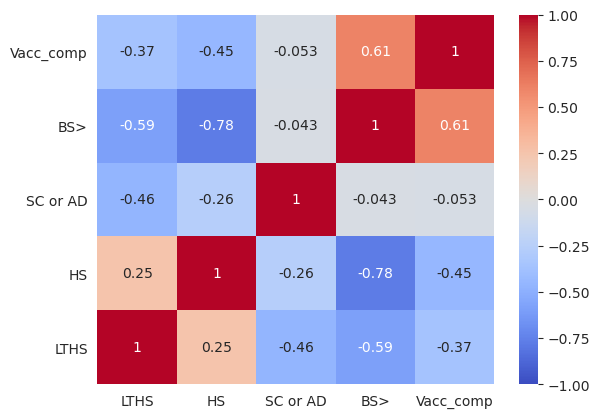

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

ax=sns.heatmap(corrColumns.corr(), annot=True, vmin = -1, vmax = 1, center = 0,
              cmap = 'coolwarm')
ax.invert_yaxis()
plt.yticks(rotation = 0)
plt.show()

In [60]:
#Correlation table
corrTable=corrColumns.corr()
#corrTable.style.bar(subset=['Vacc_comp'], align='mid', color=['#d65f5f', '#5fba7d'])
corrTable.style.format(precision=1)

### Scatterplots and Boxplots of different variables

In [31]:
import toyplot
canvas, axes, mark = toyplot.scatterplot(x, y, width=800, height=600,
                                         label='Percent Trump Votes by County vs. Percent Completely Vaccinated by County',
                                         xlabel='Percent of voters for red candidate by county', 
                                         ylabel='Percent completely vaccinated by county',
                                         size=10, opacity=0.4,
                                         color='red')

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="800.0px" height="600.0px" viewBox="0 0 800.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t39329d30b02049fea0e388f743393f1d"> <g style="fill:rgb(100%,0%,0%);fill-opacity:1.0;opacity:0.4;stroke:rgb(100%,0%,0%);stroke-opa

In [32]:
canvas, axes, mark = toyplot.scatterplot(x1, y, width=800, height=600,
                                         label='Percent Biden Votes by County vs. Percent Completely Vaccinated by County',
                                         xlabel='Percent of voters for blue candidate by county', 
                                         ylabel='Percent completely vaccinated by county',
                                         size=10, opacity=0.4,
                                         color='blue')

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="800.0px" height="600.0px" viewBox="0 0 800.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t39e3a861350c4654a35a20529f192df8"> <g style="fill:rgb(0%,0%,100%);fill-opacity:1.0;opacity:0.4;stro

In [33]:
y=covid_data3['vaccinationsCompletedRatio']
x=covid_data3['MEDHHINC_2019']
canvas, axes, mark = toyplot.scatterplot(x, y, width=800, height=600,
                                         label='Median income vs. Percent Completely Vaccinated by County',
                                         xlabel='Median income', 
                                         ylabel='Percent completely vaccinated by county',
                                         size=10, opacity=0.4,
                                         color='orange')

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="800.0px" height="600.0px" viewBox="0 0 800.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te92e698fe909484dbfa8b7431171bae0"> <g style="fill:rgb(100%,64.7%,0%);fill-opacity:1.0;opacity:0.4;stroke:rgb(100%,64.7%,0%);stro

In [34]:
y=covid_data3['vaccinationsCompletedRatio']
x=covid_data3['PCTPOVALL_2019']
canvas, axes, mark = toyplot.scatterplot(x, y, width=800, height=600,
                                         label='Percent of population in poverty vs. Percent Completely Vaccinated by County',
                                         xlabel='Percent of population in poverty', 
                                         ylabel='Percent completely vaccinated by county',
                                         size=10, opacity=0.4,
                                         color='blueviolet')

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="800.0px" height="600.0px" viewBox="0 0 800.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="td89556fdfb6645deacccbc3480cfdf31"> <g style="fill:rgb(54.1%,16.9%,88.6%);fill-opacity:1.0;opacity:0.4;stroke:rgb(

In [35]:
y=covid_data3['vaccinationsCompleted']
x=covid_data3['POVALL_2019']
canvas, axes, mark = toyplot.scatterplot(x, y, width=800, height=600,
                                         label='Population in poverty vs. Completely Vaccinated by County',
                                         xlabel='Population in poverty', 
                                         ylabel='People completely vaccinated by county',
                                         size=10, opacity=0.4,
                                         color='blueviolet')

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="800.0px" height="600.0px" viewBox="0 0 800.0 600.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t71cc9068b30741e289145d2ff63be284"> <circl

In [36]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [37]:
output_notebook()

Loading BokehJS ...

In [38]:
c = figure(plot_width=600, plot_height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
c.circle(covid_data3['POVALL_2019'], covid_data3['vaccinationsCompleted'], size=5, 
         color="cyan", fill_alpha=0.7)
c.xaxis.axis_label = 'Population in poverty'
c.yaxis.axis_label = 'Completed vaccinations'

show(c) # show the results

In [39]:
c = figure(plot_width=600, plot_height=400)

# add a circle renderer with x and y coordinates, size, color, and alpha
c.circle(covid_data3['vaccinationsCompletedRatio'],covid_data3['icuCapacityRatio'], size=5, 
         color="red", fill_alpha=0.7)
c.xaxis.axis_label = 'Fraction of completed vaccinations'
c.yaxis.axis_label = 'Fraction of ICU capacity used'

show(c) # show the results

In [40]:
ax= sns.boxplot(y='VotingPref',x='vaccinationsCompletedRatio',data=covid_data1, notch=True)
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)

# Change the appearance of that box
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:blue')
ax.set_xlabel("Fraction of completed vaccinations", fontsize = 10)
ax.set_ylabel("Voting preference", fontsize = 10)
plt.show()

In [41]:
red_vacc_comp=covid_data3['vaccinationsCompletedRatio'][covid_data3['VotingPref'] == 'Red'].values
#red_vacc_comp

In [42]:
np.count_nonzero(red_vacc_comp)

2596

In [43]:
blue_vacc_comp=covid_data3['vaccinationsCompletedRatio'][covid_data3['VotingPref'] == 'Blue'].values
#blue_vacc_comp

In [44]:
np.count_nonzero(blue_vacc_comp)

558

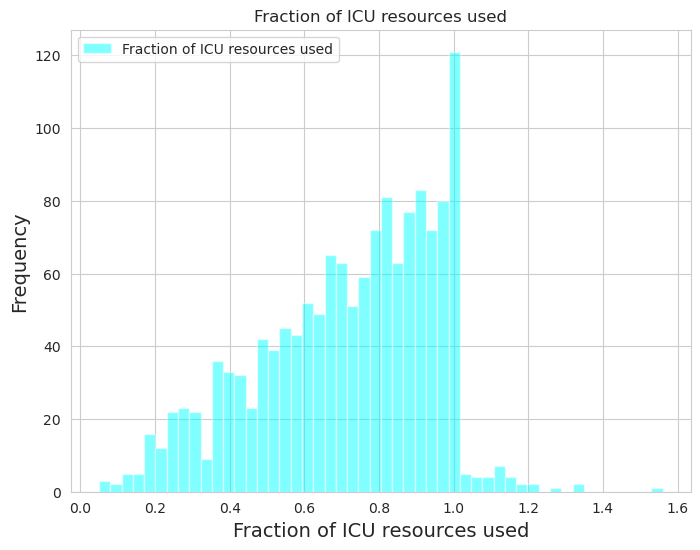

In [45]:
plt.figure(figsize=(8,6))
plt.hist(covid_data3['icuCapacityRatio'], bins=50, alpha=0.5, label="Fraction of ICU resources used", 
         color = "cyan") # ec="cyan")

plt.xlabel("Fraction of ICU resources used", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Fraction of ICU resources used")
plt.legend(loc='upper left')
plt.show()

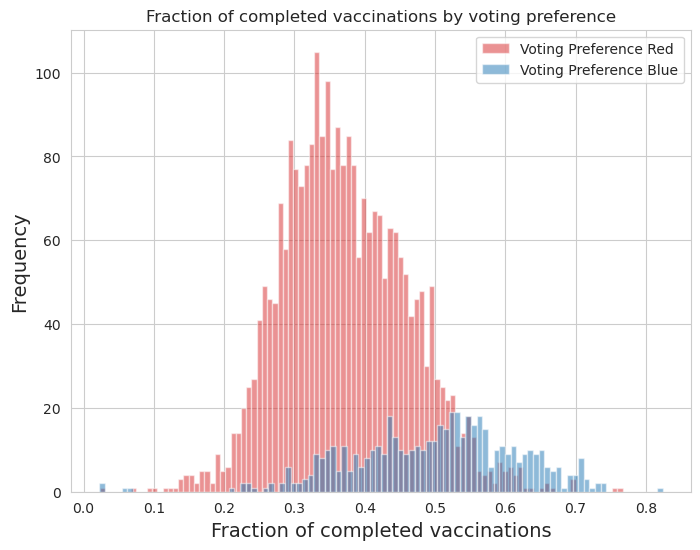

In [46]:
plt.figure(figsize=(8,6))
plt.hist(red_vacc_comp, bins=100, alpha=0.5, label="Voting Preference Red", color = "tab:red") # ec="tab:red")
plt.hist(blue_vacc_comp, bins=100, alpha=0.5, label="Voting Preference Blue", color = "tab:blue") #ec="tab:blue")

plt.xlabel("Fraction of completed vaccinations", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Fraction of completed vaccinations by voting preference")
plt.legend(loc='upper right')
plt.show()

In [47]:
ax= sns.boxplot(y='VotingPref',x='infectionRate',data=covid_data1, notch=True)
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)

# Change the appearance of that box
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:blue')
ax.set_xlabel("Infection Rate", fontsize = 10)
ax.set_ylabel("Voting Preference", fontsize = 10)
plt.show()

In [48]:
ax= sns.boxplot(y='VotingPref',x='MEDHHINC_2019',data=covid_data3, notch=True)
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)

# Change the appearance of that box
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:blue')
ax.set_xlabel("Median income by county in 2019", fontsize = 10)
ax.set_ylabel("Voting Preference", fontsize = 10)
plt.show()

In [49]:
ax= sns.boxplot(y='VotingPref',x='PCTPOVALL_2019',data=covid_data3, notch=True)
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)

# Change the appearance of that box
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:blue')
ax.set_xlabel("Percent of poverty by county", fontsize = 10)
ax.set_ylabel("Voting Preference", fontsize = 10)
plt.show()

In [50]:
ax= sns.boxplot(y='VotingPref',x='icuCapacityRatio',data=covid_data3, notch=True)
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)

# Change the appearance of that box
ax.artists[0].set_facecolor('tab:red')
ax.artists[1].set_facecolor('tab:blue')
ax.set_xlabel("Fraction of ICU resources used", fontsize = 10)
ax.set_ylabel("Voting Preference", fontsize = 10)
plt.show()

### EDA by Urban-Rural Classification

**Noncore**: counties in micropolitan areas with populations less than 10,000

**Micropolitan**: counties in a urban cluster with populations between 10,000 to 49,999

**Small Metro**: counties in a Metropolitan Statistical Area (MSA) with populations less than 250,000

**Medium Metro**: counties in MSA with populations between 250,000 and 999,999

**Large Fringe Metro**: counties in MSA with populations of 1 million or more

**Large Central Metro**: counties in MSA with populations of 1 million or more that i) contain the 
entire population of the largest principal city of the MSA, or  ii)have their entire population contained in the largest principal city of the MSA, or iii) contain at least 250,000 inhabitants of any principal city of the MSA.

source: 2013 NCHS Urban-Rural Classification Scheme for Counties. Vital and Health Statistics. Series 2, Number 166, April 2014. p.2

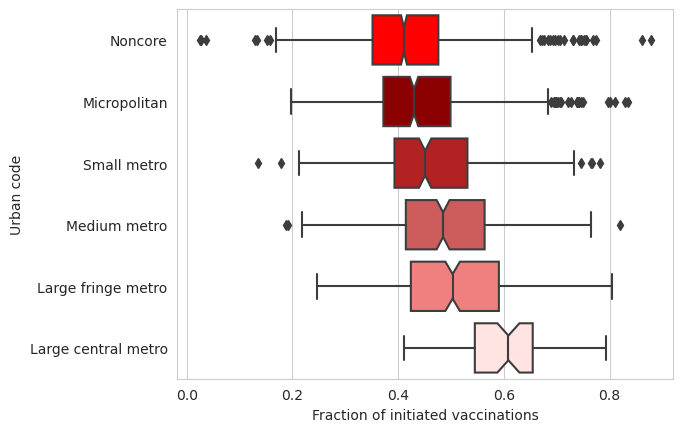

In [51]:
# my_order = covid_data3.groupby(by=["Urban_Code"])["vaccinationsInitiatedRatio"].median().iloc[::-1].index
# print(my_order)
ax= sns.boxplot(x='vaccinationsInitiatedRatio',y='Urban_Code',data=covid_data3, notch=True, 
                order=['Noncore', 'Micropolitan', 'Small metro','Medium metro', 'Large fringe metro',
                      'Large central metro'])
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)
#plt.tight_layout()
# Change the appearance of that box
ax.artists[0].set_facecolor('red')
ax.artists[1].set_facecolor('darkred')
ax.artists[2].set_facecolor('firebrick')
ax.artists[3].set_facecolor('indianred')
ax.artists[4].set_facecolor('lightcoral')
ax.artists[5].set_facecolor('mistyrose')

ax.set_xlabel("Fraction of initiated vaccinations", fontsize = 10)
ax.set_ylabel("Urban code", fontsize = 10)
plt.show()

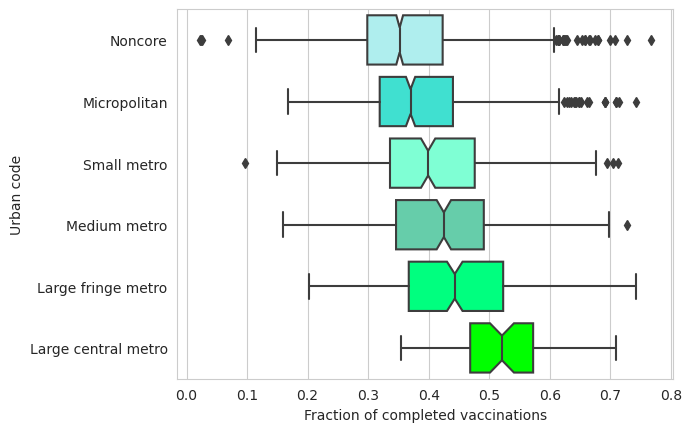

In [52]:
ax= sns.boxplot(x='vaccinationsCompletedRatio',y='Urban_Code',data=covid_data3, notch=True, 
                order=['Noncore', 'Micropolitan', 'Small metro','Medium metro', 'Large fringe metro',
                      'Large central metro'])
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)
#plt.tight_layout()
# Change the appearance of that box
ax.artists[0].set_facecolor('paleturquoise')
ax.artists[1].set_facecolor('turquoise')
ax.artists[2].set_facecolor('aquamarine')
ax.artists[3].set_facecolor('mediumaquamarine')
ax.artists[4].set_facecolor('springgreen')
ax.artists[5].set_facecolor('lime')

ax.set_xlabel("Fraction of completed vaccinations", fontsize = 10)
ax.set_ylabel("Urban code", fontsize = 10)
plt.show()

In [53]:
ax= sns.boxplot(x='infectionRate',y='Urban_Code',data=covid_data3, notch=True, 
                order=['Noncore', 'Micropolitan', 'Small metro','Medium metro', 'Large fringe metro',
                      'Large central metro'])
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)
#plt.tight_layout()
# Change the appearance of that box
ax.artists[0].set_facecolor('paleturquoise')
ax.artists[1].set_facecolor('turquoise')
ax.artists[2].set_facecolor('aquamarine')
ax.artists[3].set_facecolor('mediumaquamarine')
ax.artists[4].set_facecolor('springgreen')
ax.artists[5].set_facecolor('lime')

ax.set_xlabel("Infection rate", fontsize = 10)
ax.set_ylabel("Urban code", fontsize = 10)
plt.show()

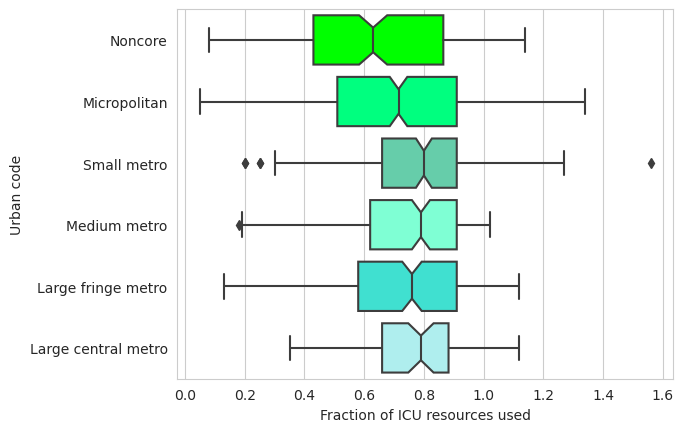

In [54]:
ax= sns.boxplot(x='icuCapacityRatio',y='Urban_Code',data=covid_data3, notch=True, 
                order=['Noncore', 'Micropolitan', 'Small metro','Medium metro', 'Large fringe metro',
                      'Large central metro'])
#ax = sns.stripplot(x="VotingPref", y="vaccinationsCompletedRatio",data=covid_data1)
#plt.tight_layout()
# Change the appearance of that box
ax.artists[5].set_facecolor('paleturquoise')
ax.artists[4].set_facecolor('turquoise')
ax.artists[3].set_facecolor('aquamarine')
ax.artists[2].set_facecolor('mediumaquamarine')
ax.artists[1].set_facecolor('springgreen')
ax.artists[0].set_facecolor('lime')


ax.set_xlabel("Fraction of ICU resources used", fontsize = 10)
ax.set_ylabel("Urban code", fontsize = 10)
plt.show()

### Saving data for analysis

In [55]:
covid_data4.to_csv('covid_data.csv')